# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [239]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [121]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 56.21, 'lon': 33.49},
 'dt': 1595447437,
 'id': 515687,
 'main': {'feels_like': 8.57,
          'grnd_level': 975,
          'humidity': 88,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 11.27,
          'temp_max': 11.27,
          'temp_min': 11.27},
 'name': 'Olenino',
 'sys': {'country': 'RU', 'sunrise': 1595381471, 'sunset': 1595441607},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 251, 'speed': 3.68}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [133]:
temp = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []

n=1
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    print(f"Processing Record {n} | {city}")
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        
        
        
    except KeyError:
        print(f"{city} not found and removed.")
        cities.pop(n-1)
    
    n=n+1


Beginning Data Retrieval
-----------------------------
Processing Record 1 | chokurdakh
Processing Record 2 | butaritari
Processing Record 3 | anloga
Processing Record 4 | ponta do sol
Processing Record 5 | bredasdorp
Processing Record 6 | faanui
Processing Record 7 | kapaa
Processing Record 8 | geraldton
Processing Record 9 | bani walid
Processing Record 10 | chuy
Processing Record 11 | port alfred
Processing Record 12 | severnyy
Processing Record 13 | catumbela
Processing Record 14 | khatanga
Processing Record 15 | zhigansk
Processing Record 16 | mattru
Processing Record 17 | adrar
Processing Record 18 | punta arenas
Processing Record 19 | yatou
Processing Record 20 | georgetown
Processing Record 21 | hobart
Processing Record 22 | tasiilaq
Processing Record 23 | bluff
Processing Record 24 | potam
Processing Record 25 | hilo
Processing Record 26 | ambulu
Processing Record 27 | safford
Processing Record 28 | albany
Processing Record 29 | new norfolk
Processing Record 30 | villa union
P

Processing Record 252 | chumikan
Processing Record 253 | mamallapuram
Processing Record 254 | namatanai
Processing Record 255 | golden
Processing Record 256 | imeni poliny osipenko
Processing Record 257 | praia da vitoria
Processing Record 258 | santa maria
Processing Record 259 | laguna
Processing Record 260 | kolyvan
Processing Record 261 | mount gambier
Processing Record 262 | tuktoyaktuk
Processing Record 263 | paso de carrasco
Processing Record 264 | iqaluit
Processing Record 265 | lindi
Processing Record 266 | namibe
Processing Record 267 | kovdor
Processing Record 268 | khani
Processing Record 269 | batticaloa
Processing Record 270 | frederikshavn
Processing Record 271 | grand gaube
Processing Record 272 | makakilo city
Processing Record 273 | prince rupert
Processing Record 274 | lata
Processing Record 275 | torbay
Processing Record 276 | tuatapere
Processing Record 277 | bonavista
Processing Record 278 | hasaki
Processing Record 279 | petropavlovsk-kamchatskiy
Processing Recor

Processing Record 499 | solnechnyy
Processing Record 500 | udachnyy
Processing Record 501 | sambava
Processing Record 502 | juiz de fora
Processing Record 503 | bandarbeyla
Processing Record 504 | pundaguitan
Processing Record 505 | burnie
Processing Record 506 | lafia
Processing Record 507 | sawtell
Processing Record 508 | bairiki
Processing Record 509 | cobija
Processing Record 510 | pouebo
Processing Record 511 | vaitape
Processing Record 512 | sajanan
Processing Record 513 | lerwick
Processing Record 514 | carmen
Processing Record 515 | beroroha
Processing Record 516 | chuka
Processing Record 517 | shahpura
Processing Record 518 | kuantan
Processing Record 519 | tiznit
Processing Record 520 | diffa
Processing Record 521 | havoysund
Processing Record 522 | paciran
Processing Record 523 | hobyo
Processing Record 524 | broome
Processing Record 525 | inyonga
Processing Record 526 | pabrade
Processing Record 527 | kruisfontein
Processing Record 528 | davila
Processing Record 529 | acari

In [140]:
for x in humidity:
    if x > 100:
        print(x)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

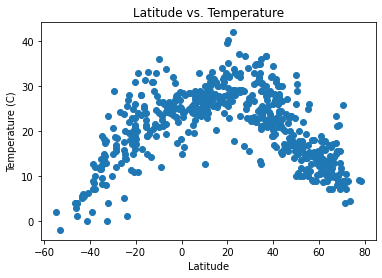

In [150]:
plt.scatter(lat,max_temp)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.show()

## Latitude vs. Humidity Plot

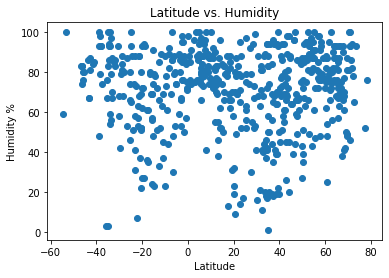

In [151]:
plt.scatter(lat,humidity)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()

## Latitude vs. Cloudiness Plot

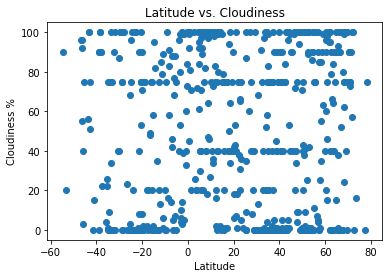

In [152]:
plt.scatter(lat,cloudiness)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()

## Latitude vs. Wind Speed Plot

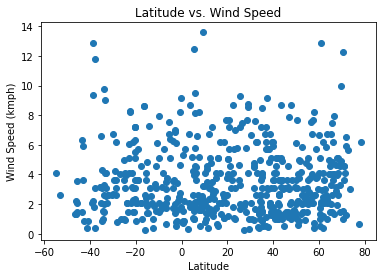

In [279]:
plt.scatter(lat,wind_speed)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")
plt.show()

## Linear Regression

In [271]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x_value, y_value):
    y_axis = list(y_value)
    x_axis = list(x_value)
    m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
    print(f"r squared={round(m_r*m_r,3)}")
    slope_line = m_slope*x_value+m_int
    plt.plot(x_value, slope_line, color = "r")
    
    return

In [235]:
dictionary = {'City':cities,
              'Country':country,
              'Temp':temp,
              'Latitude':lat,
              'Longitude':lng,
              'Max Temperature':max_temp,
              'Humidity':humidity,
              'Cloudiness':cloudiness,
              'Wind Speed':wind_speed}
weather_df = pd.DataFrame(dictionary)
# Create Northern and Southern Hemisphere DataFrames
columns = ['City','Country','Temp','Latitude','Longitude','Max Temperature','Humidity','Cloudiness','Wind Speed']
north_df = pd.DataFrame(columns = columns)
south_df = pd.DataFrame(columns = columns)

for i in weather_df.iterrows():
    if  i[1]['Latitude']>= 0:
        north_df = north_df.append(weather_df.iloc[i[0]])
    else:
        south_df = south_df.append(weather_df.iloc[i[0]])
print(north_df.count())
print(south_df.count())

City               386
Country            386
Temp               386
Latitude           386
Longitude          386
Max Temperature    386
Humidity           386
Cloudiness         386
Wind Speed         386
dtype: int64
City               169
Country            169
Temp               169
Latitude           169
Longitude          169
Max Temperature    169
Humidity           169
Cloudiness         169
Wind Speed         169
dtype: int64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r squared=0.497


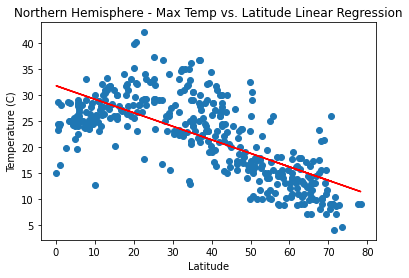

In [284]:
plt.scatter(north_df['Latitude'],north_df['Max Temperature'])
regression(north_df['Latitude'],north_df['Max Temperature'])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r squared=0.617


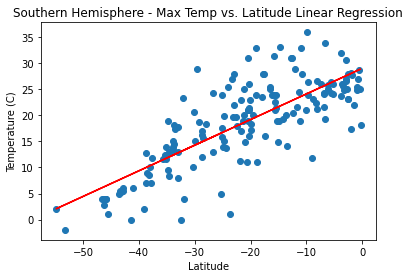

In [285]:
plt.scatter(south_df['Latitude'],south_df['Max Temperature'])
regression(south_df['Latitude'],south_df['Max Temperature'])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r squared=0.0


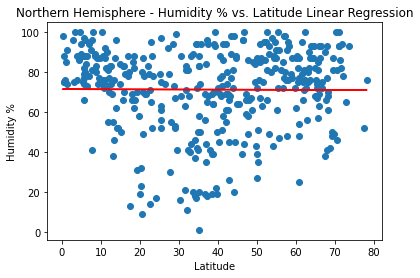

In [286]:
plt.scatter(north_df['Latitude'],north_df['Humidity'])
regression(north_df['Latitude'],north_df['Humidity'])
plt.title("Northern Hemisphere - Humidity % vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r squared=0.013


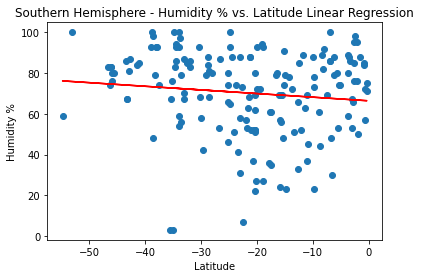

In [287]:
plt.scatter(south_df['Latitude'],south_df['Humidity'])
regression(south_df['Latitude'],south_df['Humidity'])
plt.title("Southern Hemisphere - Humidity % vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r squared=0.001


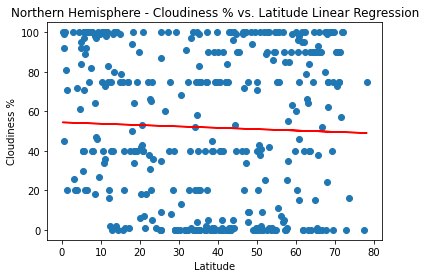

In [288]:
plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
regression(north_df['Latitude'],north_df['Cloudiness'])
plt.title("Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r squared=0.001


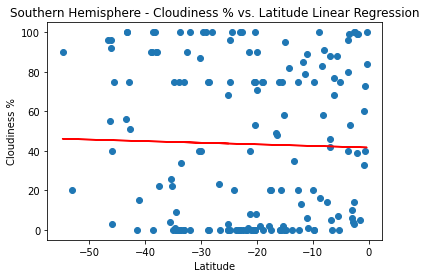

In [289]:
plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
regression(south_df['Latitude'],south_df['Cloudiness'])
plt.title("Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r squared=0.001


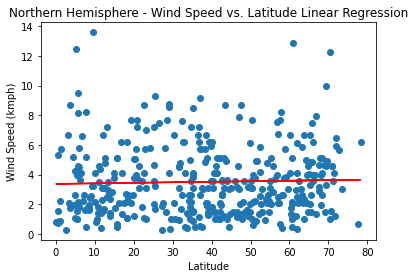

In [290]:
plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
regression(north_df['Latitude'],north_df['Wind Speed'])
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r squared=0.001


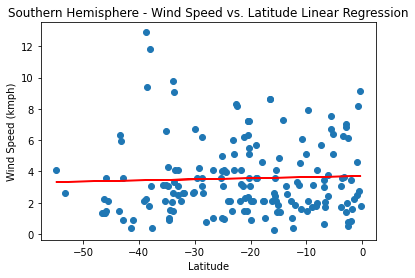

In [291]:
plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
regression(south_df['Latitude'],south_df['Wind Speed'])
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")
plt.show()